In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
path = "/content/drive/My Drive/ML With python /Final/champagne_new.xlsx"

In [0]:
import pandas as pd
data = pd.read_excel(path, index_col = 0)

In [4]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [0]:
data.index = pd.to_datetime(data.index)

In [6]:
data

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946
...,...
1972-05-01,4618
1972-06-01,5312
1972-07-01,4298


In [0]:
from datetime import datetime

In [0]:
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


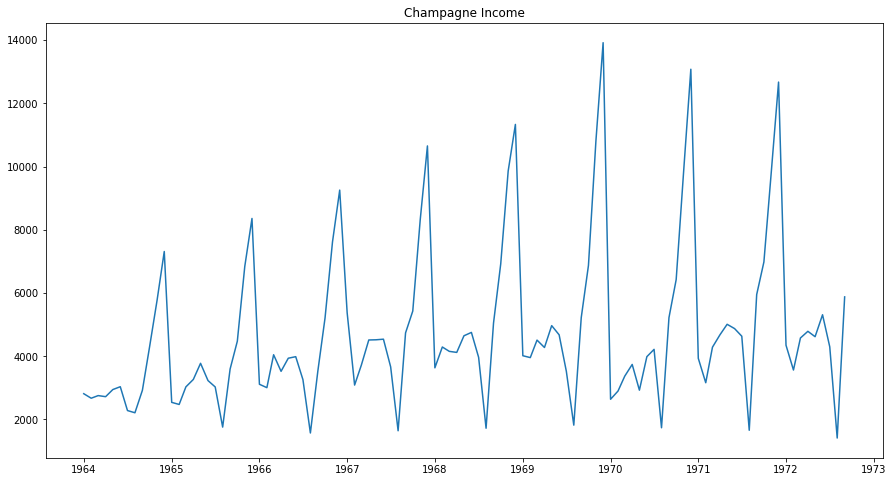

In [9]:
plt.figure(figsize=(15,8))
plt.plot(data)
plt.title("Champagne Income")
plt.show()

In [10]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(x = data, model='multiplicative')
result

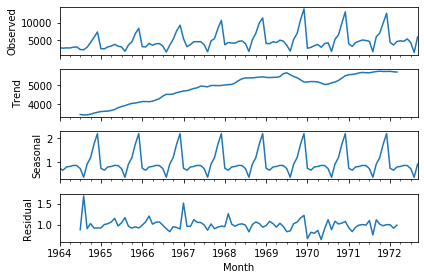

In [11]:
result.plot()
plt.show()

In [12]:
! pip install pmdarima

In [0]:
from pmdarima.arima import auto_arima

In [14]:
stepwise_model = auto_arima(data, start_p=2, start_q=2,
max_p=5, max_q=5, m=12,
start_P=1, seasonal=True,
d=1, D=1, trace=True,
error_action='ignore',
suppress_warnings=True,
stepwise=True)

Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 1, 12); AIC=1487.268, BIC=1507.443, Fit time=2.332 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1526.661, BIC=1531.705, Fit time=0.018 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=1509.055, BIC=1519.143, Fit time=0.478 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=1490.560, BIC=1500.647, Fit time=0.763 seconds
Near non-invertible roots for order (0, 1, 1)(0, 1, 1, 12); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=1524.662, BIC=1527.183, Fit time=0.025 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(0, 1, 1, 12); AIC=1490.027, BIC=1507.680, Fit time=1.853 seconds
Fit ARIMA: order=(2, 1, 2) seasonal_order=(1, 1, 0, 12); AIC=1485.543, BIC=1503.195, Fit time=2.144 seconds
Near non-invertible roots for order (2, 1, 2)(1, 1, 0, 12); setting score to inf (at 

In [15]:
print(stepwise_model.aic())

1485.5427705162533


In [16]:
data.head()

,monthly_champange
Month,
1964-01-01,2815
1964-02-01,2672
1964-03-01,2755
1964-04-01,2721
1964-05-01,2946


In [0]:
train = data.loc['1964-01-01':'1970-08-01']
test = data.loc['1970-09-01':]

In [18]:
train.shape

(80, 1)

In [44]:
test.shape

(25, 1)

In [45]:
stepwise_model.fit(train)

ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 2), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(1, 1, 0, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [0]:
future_forecast = stepwise_model.predict(n_periods=len(test))

In [47]:
future_forecast

array([ 5227.38243044,  6540.55604149, 10655.24239487, 13421.12029499,
        2566.25361659,  2607.99466634,  3229.10413778,  3403.83948838,
        2789.21329571,  3640.3125391 ,  3872.87333573,  1334.92039193,
        4880.2959648 ,  6127.78396711, 10276.01607356, 12991.73533386,
        2143.23747318,  2138.95773705,  2772.03013222,  2908.55072596,
        2294.95955177,  3115.75272823,  3354.53558812,   783.16405001,
        4326.60452018])

In [0]:
future_forecast = pd.DataFrame(future_forecast,
index = test.index,
columns=['Prediction'])

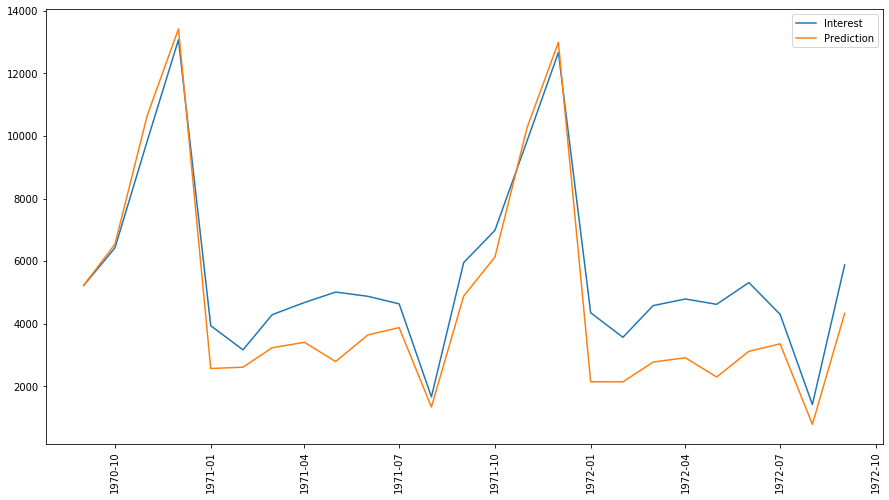

In [49]:
plt.figure(figsize=(15,8))
plt.plot(test, label='Interest')
plt.plot(future_forecast, label='Prediction')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()

In [50]:
future_forecast_9 = stepwise_model.predict(n_periods=len(test)+9)
future_forecast_9

array([ 5227.38243044,  6540.55604149, 10655.24239487, 13421.12029499,
        2566.25361659,  2607.99466634,  3229.10413778,  3403.83948838,
        2789.21329571,  3640.3125391 ,  3872.87333573,  1334.92039193,
        4880.2959648 ,  6127.78396711, 10276.01607356, 12991.73533386,
        2143.23747318,  2138.95773705,  2772.03013222,  2908.55072596,
        2294.95955177,  3115.75272823,  3354.53558812,   783.16405001,
        4326.60452018,  5545.46496084,  9689.18629896, 12378.81151548,
        1524.34801603,  1496.42836928,  2120.821034  ,  2235.35620407,
        1611.85665906,  2411.85494468])

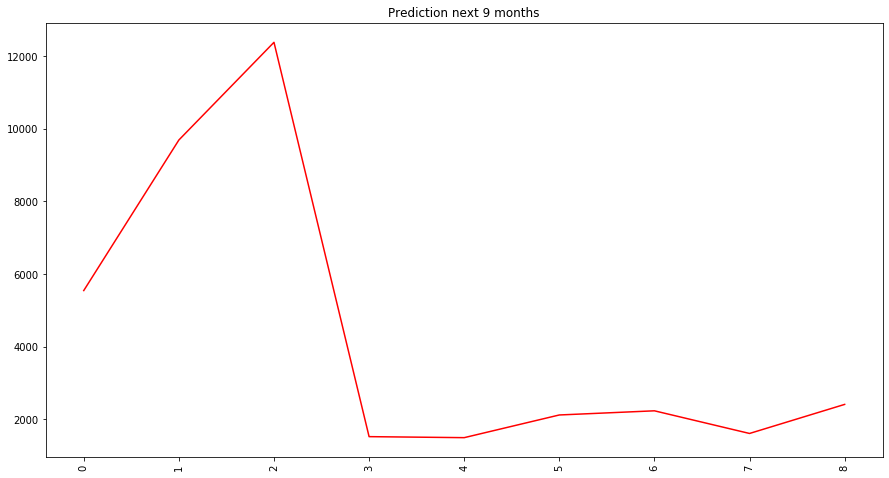

In [51]:
plt.figure(figsize=(15,8))
plt.plot(future_forecast_9[len(test):], color='red')
plt.xticks(rotation='vertical')
plt.title("Prediction next 9 months")
plt.show()

In [52]:
data.index

DatetimeIndex(['1964-01-01', '1964-02-01', '1964-03-01', '1964-04-01',
               '1964-05-01', '1964-06-01', '1964-07-01', '1964-08-01',
               '1964-09-01', '1964-10-01',
               ...
               '1971-12-01', '1972-01-01', '1972-02-01', '1972-03-01',
               '1972-04-01', '1972-05-01', '1972-06-01', '1972-07-01',
               '1972-08-01', '1972-09-01'],
              dtype='datetime64[ns]', name='Month', length=105, freq=None)

In [0]:
x = data.index[-1]

In [0]:
from dateutil.relativedelta import * 
Month = []
for i in range(9):
    x = x + relativedelta(months=+1)
    y = str(x)
    Month.append(y[:7])

In [88]:
Month

['1972-10',
 '1972-11',
 '1972-12',
 '1973-01',
 '1973-02',
 '1973-03',
 '1973-04',
 '1973-05',
 '1973-06']

In [0]:
value = future_forecast_9[len(test):]

In [90]:
type(value)

numpy.ndarray

In [91]:
type(date)

list

In [92]:
pre9 = pd.DataFrame(value, index=Month)
pre9

,0
1972-10,5545.464961
1972-11,9689.186299
1972-12,12378.811515
1973-01,1524.348016
1973-02,1496.428369
1973-03,2120.821034
1973-04,2235.356204
1973-05,1611.856659
1973-06,2411.854945


In [0]:
pre9.index = pd.to_datetime(pre9.index)

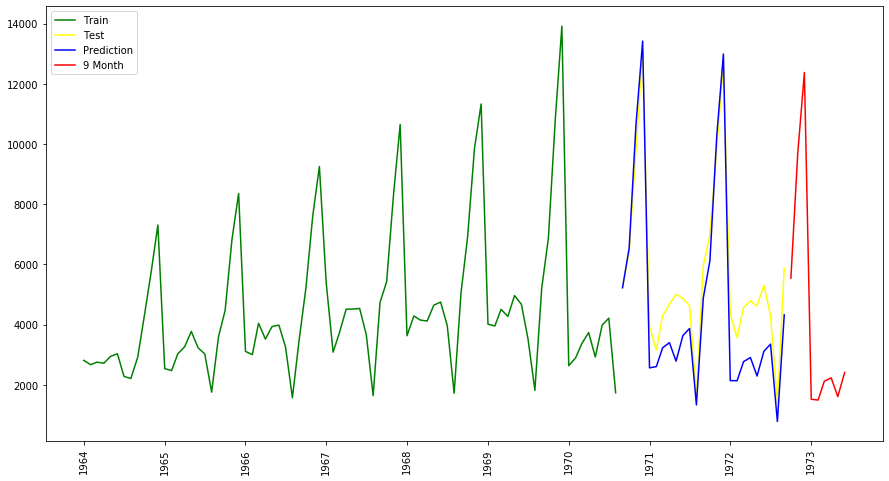

In [94]:
plt.figure(figsize=(15,8))
plt.plot(train, label='Train',  color='green')
plt.plot(test, label='Test', color='yellow')
plt.plot(future_forecast, label='Prediction', color='blue')
plt.plot(pre9, label='9 Month', color='red')
plt.xticks(rotation='vertical')
plt.legend()
plt.show()